In [253]:
import pandas as pd
import numpy as np

In [254]:
data_1 = pd.read_csv("data_w_successV1.csv")
data_2 = pd.read_csv("founder_V3_withsurvey.csv")

df = pd.merge(data_1,data_2, left_on ="Full_Name", right_on ="Full_Name", how="inner")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [255]:
df =df.drop_duplicates()
df.shape

(17942, 68)

## DATA VISUALIZATION

In [18]:
categories= list(set(df["Categories_x"].values))
len(categories)

In [20]:
category_list = []
for category in categories[1:]:
    x = category.split(",")
    category_list.extend(x)

In [93]:
category_list = list(category_list)
category_list = list(map(lambda x: x.lstrip(), category_list))

In [22]:
len(category_list)

34333

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

#### Most Popular Markets for Investment

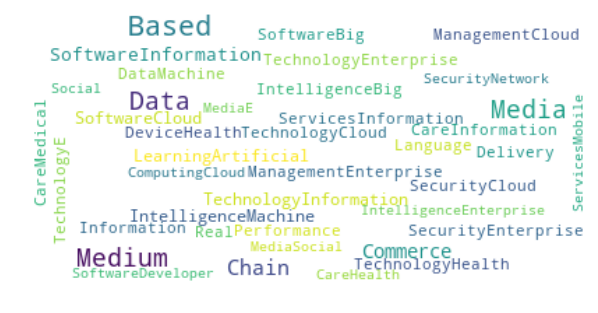

In [34]:
text = category_list
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=20, max_words=40, background_color="white").generate("".join(text))
plt.figure(figsize=(10,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
import collections 

In [90]:
d= collections.Counter(category_list)
category_count =pd.DataFrame(sorted(d.items(), key=lambda item: item[1], reverse=True))
category_count.columns = ["category", "count"]

Text(0.5, 0, 'Number of Investments')

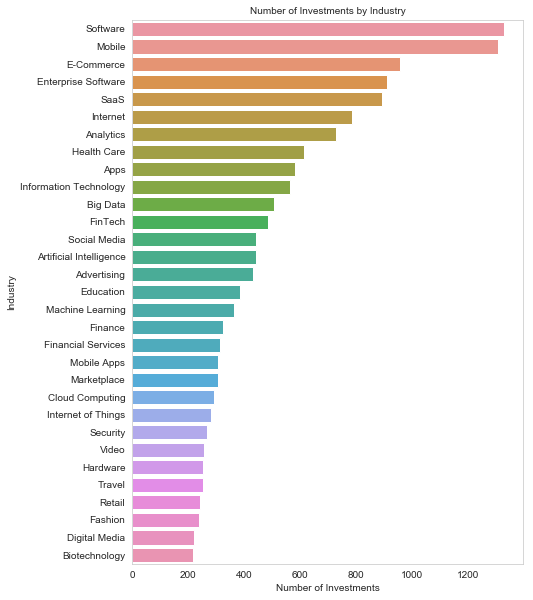

In [196]:
import seaborn as sns
plt.figure(figsize=(7,10))
#plt.xticks(rotation='90')
plt.title('Number of Investments by Industry', fontsize=10)
ax = sns.barplot(y="category", x="count", data=category_count.loc[:30])
plt.ylabel('Industry', fontsize=10)
plt.xlabel('Number of Investments', fontsize=10)

### Number of Investors by Round

Text(0, 0.5, 'Frequency (%)')

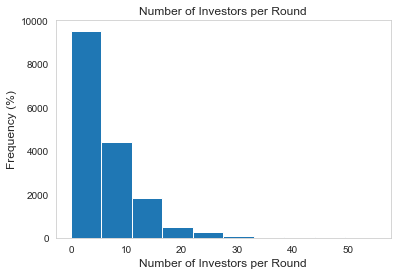

In [150]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Number of Investors per Round', fontsize=12)
plt.hist(df[df["Number of Investors"].notna()]["Number of Investors"])
plt.xlabel('Number of Investors per Round', fontsize=12)
plt.ylabel('Frequency (%)', fontsize=12)

In [164]:
def get_state(x):
    try:
        x= x.split(",")
        if len(x) == 3:
            if x[1] == ' China':
                return x[0]
            return x[1]
        else:
            return None
    except:
        return None

In [171]:
headquarters = list(df[df["Headquarters Location"].notna()]["Headquarters Location"].apply(get_state))
headquarters = [x for x in headquarters if str(x) != 'nan']

In [172]:
d= collections.Counter(headquarters)
headquarters_count =pd.DataFrame(sorted(d.items(), key=lambda item: item[1], reverse=True))
headquarters_count.columns = ["headquarter", "count"]

Text(0.5, 0, 'Frequency')

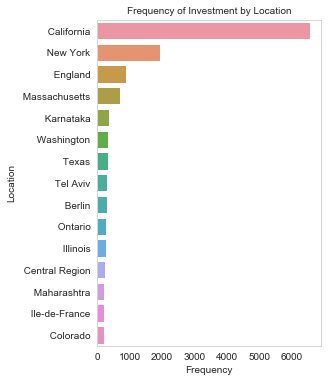

In [213]:
plt.figure(figsize=(4,6))
#plt.xticks(rotation='90')
plt.title('Frequency of Investment by Location', fontsize=10)
ax = sns.barplot(y="headquarter", x="count", data=headquarters_count.loc[:15])
plt.ylabel('Location', fontsize=10)
plt.xlabel('Frequency', fontsize=10)

In [183]:
def get_country(x):
    x= x.split(",")
    if len(x) == 3:
        if x[1] == ' China':
            return x[1]
        return x[2]
    if len(x) ==2:
        if x[1] in ["Asia", "North America", "Europe"]:
            return x[0]
    else:
        return None

In [188]:
countries = df[df["Headquarters Location"].notna()]["Headquarters Location"].apply(get_country)
countries = [x for x in countries if str(x) != 'nan']

In [189]:
d= collections.Counter(countries)
countries_count =pd.DataFrame(sorted(d.items(), key=lambda item: item[1], reverse=True))
countries_count.columns = ["country", "count"]

Text(0, 0.5, 'Frequency')

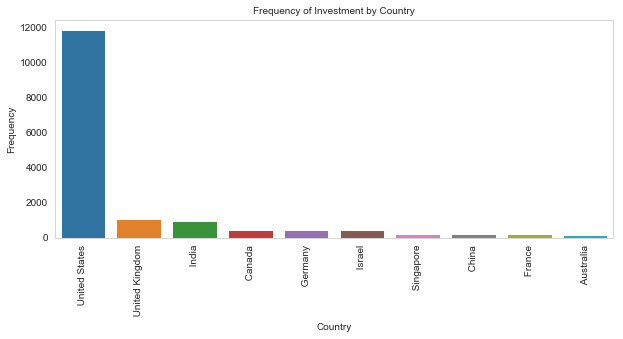

In [212]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,4))
plt.xticks(rotation='90')
plt.title('Frequency of Investment by Country', fontsize=10)
ax = sns.barplot(x="country", y="count", data=countries_count.loc[:10])
plt.xlabel('Country', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

In [ ]:
def get_country(x):
    x= x.split(",")
    if len(x) == 3:
        if x[1] == ' China':
            return x[1]
        return x[2]
    if len(x) ==2:
        if x[1] in ["Asia", "North America", "Europe"]:
            return x[0]
    else:
        return None

countries = df[df["Headquarters Location"].notna()]["Headquarters Location"].apply(get_country)
countries = [x for x in countries if str(x) != 'nan']

d= collections.Counter(countries)
countries_count =pd.DataFrame(sorted(d.items(), key=lambda item: item[1], reverse=True))
countries_count.columns = ["country", "count"]

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,4))
plt.xticks(rotation='90')
plt.title('Frequency of Investment by Country', fontsize=10)
ax = sns.barplot(x="country", y="count", data=countries_count.loc[:10])
plt.xlabel('Country', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

## This notebook has the code to make dummies for
1. BA, Masters, PhD dummies
2. Ivy League dummies
3. Tech hub dummies
4. Industry Dummies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_people = pd.read_csv("data_w_successV1.csv")
# Use csv file where the industry only has the first word.

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_people.fillna(0,inplace=True)

In [4]:
df_people.columns

Index(['Unnamed: 0', 'Full_Name', 'Primary Job Title', 'Gender', 'Biography',
       'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       'Headquarters Location', 'Operating Status', 'Founded Date',
       'Closed Date', 'Company Type', 'Number of Founders',
       'Number of Employees', 'Number of Funding Rounds', 'Funding Status',
       'Last Funding Date', 'Last Funding Amount', 'Last Funding Type',
       'Last Equity Funding Amount', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Funding Amount',
       'Number of Lead Investors', 'Number of Investors', 'Acquisition Status',
       'IPO Status', 'IPO Date', 'Number of Events_y', 'Success_all'],
      dtype='object')

## Industry dummies

In [5]:
searchfor10 = ['Innovation Management', 'Search Engine', 'Software', 'Internet', 'Artificial Intelligence', 
               'Hardware', 'Analytics', 'Open Source', 'Information Technology', 'Developer Platform', 
               'Video Conferencing', 'Internet of Things', 'Cryptocurrency', 'Natural Language Processing',
               'Reading Apps', 'Machine Learning', 'Video','Cloud Computing',  'Assistive Technology', 
               'Marketing Automation', 'Robotics','Data Center', 'Human Computer Interaction', 'GPS', 'Online Games',
               'Speech Recognition', 'CleanTech', 'Computer Vision','Social Network', 'Predictive Analytics',
               'Sensor', 'Consumer Software', 'Virtual Assistant', 'Augmented Reality','Flash Storage', 'Mobile', 
               'Virtualization','Business Intelligence', 'Cyber Security', 'Network Security', 'Embedded Software', 
               '3D Technology', 'Enterprise Software', 'Fraud Detection', 'Cloud Data Services','Nanotechnology',
               'MOOC', 'Mobile Payments', 'Mobile Apps',  'Photo Sharing', 'Task Management',  'Wireless',  
               'Big Data',  'Data Integration', 'IT Management', 'Information Services', 'Printing', 'Web Hosting',  
               'Facial Recognition', 'Messaging', 'Online Portals', 'iOS', 'Web Browsers', 'Web Development',
               'Transaction Processing', 'Language Learning','File Sharing', 'Database',  'Enterprise Applications', 
               'Gaming', 'Drones', 'Android', 'EdTech', 'Operating Systems',  'Private Cloud', 'Autonomous Vehicles', 
               'Developer APIs', 'Data Center Automation',   'PaaS',  'Software Engineering', 'Drone Management', 
               'Cloud Management', 'Text Analytics', 'Cloud Security', 'Visual Search', 'IT Infrastructure', 
               'Computer', 'Apps', 'Automotive','Communication Hardware','Email', 'Web Design', 'Retail Technology', 
               'E-Commerce Platforms', 'Mobile Devices','Audio', 'Technical Support', 'Spam Filtering', 
               'Virtual Reality', 'VoIP',  'IaaS', 'Peer to Peer', 'Browser Extensions', 'Video Streaming', 
               'GreenTech','Product Design', 'Data Storage'',’Sales Automation', 'Content Creators', 
               'Product Research','Subscription Service', 'Cloud Storage',  'Communications Infrastructure', 
               'Aerospace' , 'Meeting Software', 'Web Apps', 'Location Based Services','Navigation',   
               'Data Mining', 'Data Visualization','Cloud Infrastructure', 'Consumer Applications','Virtual Desktop',
               'Telecommunications','Developer Tools', 'Graphic Design', 'eSports', 'PC Games',
               'Application Performance Management', 'Management Information Systems','Electronics', 
               'Fantasy Sports', 'Console Games', 'In-Flight Entertainment', 'EBooks','MMO Games',  
               'Semantic Search', 'Image Recognition', 'Video on Demand', 'Mapping Services', 'Google Glass',
               'Biometrics', 'Network Hardware','STEM Education' , 'Electric Vehicle', 'UX Design', 'A/B Testing', 
               'Semiconductor', 'EHR', 'SaaS', 'Industrial Automation', 'RFID', 'ISP', 'ERP',
               'Satellite Communication', 'Business Information Systems', 'Incubators', 'Product Search',  
               '3D Printing', 'QR Codes', 'E-Signature','Windows Phone','Virtual World', 'Intrusion Detection', 
               'Ride Sharing','Privacy', 'GovTech', 'Gamification', 'Timeshare']
df_people["tech_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor10), na=False),1,0)
df_people["tech_dummy"].value_counts()

1    13339
0     5107
Name: tech_dummy, dtype: int64

In [6]:

searchfor11 = ['Biotechnology', 'Genetics', 'Health Care',  'Hospital', 'Health Diagnostics',  'Elder Care', 
'Personal Health', 'Neuroscience', 'Medical', 'Health Insurance',  'Clinical Trials',  'Diabetes', 
'Home Health Care',  'Life Science','mHealth',  'Emergency Medicine', 'Bioinformatics',  'Alternative Medicine', 
'Medical Device', 'Child Care', 'Dental', 'Pharmaceutical', 'Therapeutics', 'EHR', 'Psychology']
df_people["health_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor11), na=False),1,0)
df_people["health_dummy"].value_counts()


0    16161
1     2285
Name: health_dummy, dtype: int64

In [7]:
searchfor12 = ['Impact Investing', 'Stock Exchanges',  'Credit Cards', 'Personal Finance', 'FinTech', 'Wealth Management', 
'Bitcoin', 'Mobile Payments', 'Banking',  'Asset Management', 'Finance', 'Financial Services', 'Crowdfunding', 
'Lending',  'Embedded Systems', 'Venture Capital', 'Health Insurance', 'Hedge Funds', 'Payments' , 'Crowdsourcing', 
'Insurance', 'Accounting', 'Credit', 'Property Insurance',  'InsurTech', 'Life Insurance', 'Commercial Insurance', 
'Risk Management', 'Angel Investment', 'Emerging Markets','Financial Exchanges', 'Virtual Currency', 
'Commercial Lending', 'Debt Collections',  'Trading Platform', 'Consumer Lending', 'Credit Bureau']
df_people["finance_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor12), na=False),1,0)
df_people["finance_dummy"].value_counts()

0    16125
1     2321
Name: finance_dummy, dtype: int64

In [8]:
searchfor13 = ['Travel', 'Transportation', 'Hospitality',  'Biopharma', 'Tourism', 'Service Industry',  
               'Vacation Rental', 'Travel Accommodations', 'Hotel', 'Local', 'Travel Agency', 'Business Travel',  
               'Resorts', 'Museums and Historical Sites', 'Recreational Vehicles', 'Air Transportation', 'Guides', 
               'Adventure Travel','Tour Operator']
df_people["travel_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor13), na=False),1,0)
df_people["travel_dummy"].value_counts()

0    16935
1     1511
Name: travel_dummy, dtype: int64

In [9]:
searchfor14 = ['Digital Media', 'Brand Marketing', 'Social Media Marketing', 'Video Advertising', 'Social News', 
'Digital Marketing', 'Advertising Platforms', 'Outdoor Advertising', 'Content Marketing',  'Video Chat', 
'Email Marketing', 'SMS', 'Ad Network', 'Social Media',  'Affiliate Marketing', 'Media and Entertainment', 
'Digital Entertainment', 	'App Marketing','Ad Retargeting', 'Content Discovery',  'Marketing', 'Ad Targeting',
'Private Social Networking','Freemium','Local Advertising', 'Market Research', 'Mobile Advertising',  
'Music Venues', 'Social Media Advertising','Advertising', 'Video on Demand', 'Content', 'Casual Games', 
'Animation','Video Editing', 'Simulation', 'Social Media Management',  
'Independent Music', 'Broadcasting',  'Consumer Research', 'SEO','Direct Marketing',  'Internet Radio']

df_people["media_marketing_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor14), na=False),1,0)
df_people["media_marketing_dummy"].value_counts()

0    15390
1     3056
Name: media_marketing_dummy, dtype: int64

In [10]:
searchfor15 = ['Wind Energy', 'Environmental Engineering', 'Solar', 'Precious Metals',  'GreenTech', 'Energy Management',  
'Green Consumer Goods', 'Green Building' , 'Oil and Gas', 'Renewable Energy', 'Clean Energy', 'Sustainability', 
'Mining Technology', 'Geospatial',  'AgTech',   'Agriculture', 'Water', 'Energy Storage', 'Natural Resources', 
'Waste Management', 'Nuclear', 'Water Purification', 'Recycling','Fuel']

df_people["energy_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor15), na=False),1,0)
df_people["energy_dummy"].value_counts()


0    17985
1      461
Name: energy_dummy, dtype: int64

In [11]:
searchfor16 = [ 'Rental Property', 'Home Renovation', 'Energy', 'Energy Efficiency', 'Property Development', 
               'Real Estate Investment', 'Commercial Real Estate', 'Property Management', 'Home Improvement', 
               'Building Maintenance', 'Architecture', 'Construction', 
               'Smart Building']
df_people["realestate_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor16), na=False),1,0)
df_people["realestate_dummy"].value_counts()

0    17939
1      507
Name: realestate_dummy, dtype: int64

In [12]:
searchfor17 = ['Shoes', 'Lifestyle', 'Dietary Supplements', 'Wedding', 'Blogging Platforms', 'Identity Management', 
'Beauty', 'Rental', 'Organic Food', 'Food and Beverage', 'Fashion',  'Wellness', 'Shopping', 'Events', 
'Restaurants', 'Fitness', 'Music',  'Interior Design', 'Commercial', 'Sports', 'Lingerie',  'Consumer Goods', 
'Film Production', 'Bakery',  'Snack Food', 'Food Delivery', 'Home Decor', 'Film',  'Home Services',  'Art', 
'Wearables', 'Amusement Park and Arcade',  'Leisure', 'Jewelry', 'Edutainment', 'Video Games', 'Home and Garden',
'Lighting', 'Cooking', 'Wine And Spirits', 'Laundry and Dry-cleaning', 'Food Processing','Grocery', 'Elderly',
'Music Streaming', 'Photo Editing','Dating',  'Cosmetics', 'Outdoors', 'Cycling', 'Social Innovation','Nightclubs', 
'Seafood',  'Organic', 'Nightlife', 'Concerts', 'Food Trucks', 'Nutrition', 'Gift', 'Comics', 'Eyewear', 
'Social Recruiting', 'Charter Schools', 'Craft Beer', 'Higher Education', 'Recipes', 'Fruit',"Men's",
'Housekeeping Service', 'Winery', 'Casino','Soccer','Self-Storage', 'Basketball', 'Flowers', 'Coffee', 'Brewing',
'Car Sharing', 'Tea','Pet', 'Gambling', 'Sporting Goods' ,  'TV', 'Textbook', 'Photography', 'Personal Development', 
'Textiles', 'Family']
df_people["lifestyle_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor17), na=False),1,0)
df_people["lifestyle_dummy"].value_counts()

0    13946
1     4500
Name: lifestyle_dummy, dtype: int64

In [13]:
searchfor18 = ['Consumer Electronics', 'Furniture', 'E-Commerce', 'Retail', 'Retail Technology', 'Same Day Delivery',
               'Toys',
'Marketplace', 'Shopping', 'Online Auctions',  'Sales', 'Consumer', 'Loyalty Programs', 'Point of Sale',  
'Price Comparison', 'Wholesale', 'Group Buying', 'Franchise']
df_people["retail_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor18), na=False),1,0)
df_people["retail_dummy"].value_counts()

0    14892
1     3554
Name: retail_dummy, dtype: int64

In [14]:
searchfor19 = [ 'Knowledge Management', 'Skill Assessment','Project Management', 'Customer Service', 'Employment', 
               'Creative Agency' ,  'Billing', 'Content Delivery Network', 'Packaging Services','Coworking', 
               'Outsourcing','Scheduling', 'Document Management', 'Staffing Agency', 'Freelance', 
               'Supply Chain Management', 'Facilities Support Services', 'Compliance', 'Productivity Tools', 
               'Warehousing', 'Office Administration','Product Management', 'Logistics', 'Small and Medium Businesses',
               'Professional Networking', 'Employee Benefits', 'Event Management', 'Freight Service', 'Presentations', 
               'Contact Management',  'Corporate Training', 'Call Center', 'Document Preparation', 
               'Facility Management', 'Content Syndication', 'Management Consulting', 'Lead Management', 
               'Career Planning', 'Fleet Management', 'Business Development', 'Professional Services', 'Procurement', 
               'Consulting'

]
df_people["logistics_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor19), na=False),1,0)
df_people["logistics_dummy"].value_counts()

0    16671
1     1775
Name: logistics_dummy, dtype: int64

In [15]:
searchfor20 = [
'Delivery', 'Education', 'Recruiting', 'CRM', 'Non Profit', 'Q&A', 'Advanced Materials', 'Quantified Self',
    'National Security', 'Coupons', 'Sponsorship', 'Collaboration','Tutoring', 'E-Learning', 'Real Time', 
    'Humanitarian', 'Training', 'Advice','News', 'Gift Card', 'Human Resources','Reservations','Classifieds',  
    'Farming', 'Enterprise','Millennials', 'Manufacturing', 'Ticketing','Collectibles', 'TV Production', 
    'Industrial', 'Recreation', 'Collaborative Consumption', 'Public Transportation', 'B2B', 'Industrial Engineering',
    'Politics', 'Podcast', 'Lead Generation','Personalization', 'CMS', 'LGBT', 'Publishing', "Women's", 'Children', 
    'Test and Measurement','Local Business', 'Social CRM', 'Animal Feed', 'Public Relations','College Recruiting',
    'Public Safety','Communities', 'Mechanical Engineering','Shipping', 'Parenting', 'Space Travel', 'Racing',
    'Reputation','Intellectual Property','Journalism' , 'Continuing Education',  'Retirement','Motion Capture',
    'Law Enforcement','Social','Sharing Economy', 'Infrastructure','Funerals', 'Auctions', 'Catering','Alumni', 
    'Ediscovery', 'Film Distribution', 'Landscaping', 'Assisted Living','B2C', 'Veterinary','Indoor Positioning', 
    'Shipping Broker',  'Homeless Shelter', 'Virtual Goods', 'Parking', 'Battery','Baby', 'Field Support', 
    'Universities','Mechanical Design', 'NFC', 'Chemical','Contests', 'Social Entrepreneurship', 'Handmade', 
    'Rehabilitation', 'DSP', 'Homeland Security', 'CAD', 'Religion', 'Electrical Distribution', 'Cosmetic Surgery',
    'ICT', 'DIY', 'Courier Service', 'Music Education', 'Machinery Manufacturing','Physical Security', 'Young Adults'
    , 'Security']
df_people["other_dummy"] = np.where(df_people['Categories'].str.contains('|'.join(searchfor20), na=False),1,0)
df_people["other_dummy"].value_counts()

0    10997
1     7449
Name: other_dummy, dtype: int64

In [16]:
#df_people.to_csv("education_features.csv",index=False,encoding='utf-8')

In [17]:
df_people.columns

Index(['Unnamed: 0', 'Full_Name', 'Primary Job Title', 'Gender', 'Biography',
       'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       'Headquarters Location', 'Operating Status', 'Founded Date',
       'Closed Date', 'Company Type', 'Number of Founders',
       'Number of Employees', 'Number of Funding Rounds', 'Funding Status',
       'Last Funding Date', 'Last Funding Amount', 'Last Funding Type',
       'Last Equity Funding Amount', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Funding Amount',
       'Number of Lead Investors', 'Number of Investors', 'Acquisition Status',
       'IPO Status', 'IPO Date', 'Number of Events_y', 'Success_all',
       'tech_dummy', 'health_dummy', 'finance_dummy', 'travel_dummy',
       'media_marketing_dum

## DEGREE DUMMY

In [18]:
searchfor1 = ['masters','mtech','master','m.sc.','ms','ma','m.s.c', 'meng', 'mse', 'm.eng', 'm.ed']
df_people["Masters"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor1), na=False),1,0)

# searchfor1 = ['ba','bba','bsc','btech','bachelor','b.a','bs/ms','b.s.','undergrad','be','btech','bas','bcom','b.sc','b.e','a.b.','aa','beng','bsba','b.eng','bca']
searchfor2 = ['bba','bsc','btech','bachelor','b.a','bs/ms','b.s.','undergrad','a.b.','aa','beng','bsba','b.eng','bca']
df_people["Bachelors"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor2), na=False),1,0)

searchfor3 = ['phd','doctor','ph.d']
df_people["Phd"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor3), na=False),1,0)

searchfor4 = ['computer','information','technology','computer']
df_people["Computer Science"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor4), na=False),1,0)

searchfor5 = ['business','management','finance','accounting','commerce','mba','bcom','m.b.a.','economics','eco','market']
df_people["Business"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor5), na=False),1,0)

searchfor6 = ['law','literature','philosophy','psychology','journalism','art']
df_people["Arts"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor6), na=False),1,0)

searchfor7 = ['engineering','physics','electrical','civil','environment','e.e.','neuroscience','electronic','mechanical','mech','chemical']
df_people["Engineering"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor7), na=False),1,0)

In [19]:
df_people[['Computer Science','Business','Engineering','Masters','Phd','Bachelors','Arts']].sum()

Computer Science    4367
Business            6587
Engineering         9429
Masters             8909
Phd                  980
Bachelors           7722
Arts                5474
dtype: int64

In [20]:
searchfor8 = ['brown', 'columbia', 'cornell', 'dartmouth', 'harvard','pennsylvania', 'princeton','yale','upenn','caltech', 'mit', 'stanford']
df_people["ivy_league"] = np.where(df_people['Biography'].str.lower().str.contains('|'.join(searchfor8), na=False),1,0)
#df_people['ivy_league'].value_counts()

In [21]:
df_people.to_csv("final_data.csv",index=False,encoding='utf-8')